In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import ase
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

import abtem

abtem.config.set({"local_diagnostics.progress_bar": True});

# Visualizations

In [2]:
atoms_cell = ase.build.bulk("Si", cubic=True)

atoms = atoms_cell * (1, 1, 100)

potential = abtem.Potential(atoms, sampling=0.05, slice_thickness=2)

wave = abtem.PlaneWave(energy=200e3)

wave.grid.match(potential)

defocus = np.linspace(0, 100, 3)
Cs = np.linspace(0, 0, 3)

measurements = (wave.build().multislice(potential)).apply_ctf(defocus=defocus).compute()

[########################################] | 100% Completed | 2.88 sms


## Adjusting individual elements

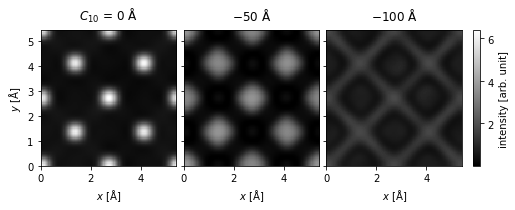

In [3]:
%matplotlib inline

visualization = measurements.apply_ctf(semiangle_cutoff=30).show(
    explode=True,
    common_color_scale=True,
    figsize=(8, 8),
    cbar=True,
    cmap="gray",
)

In [4]:
object.__repr__(visualization.fig)

'<matplotlib.figure.Figure object at 0x00000288F3F58C40>'

In [5]:
visualization.axes

In [6]:
visualization.axes[0, 0]

<Axes: xlabel='$x$ [$\\mathrm{\\AA}$]', ylabel='$y$ [$\\mathrm{\\AA}$]'>

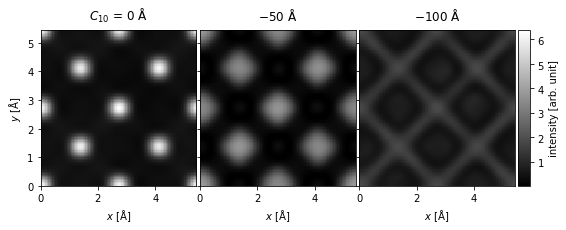

In [7]:
visualization.set_axes_padding((0.05, 0.0))
visualization.set_cbar_size(0.075)
visualization.set_cbar_padding((0.05, 0.0))

visualization.fig

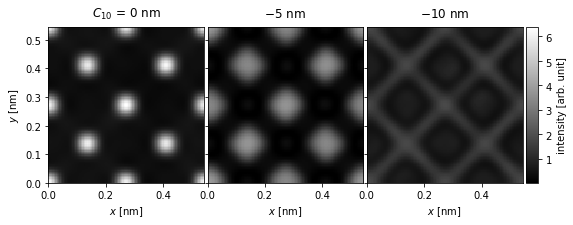

In [8]:
visualization.set_column_titles(units="nm")
visualization.set_x_units("nm")
visualization.set_y_units("nm")

visualization.fig

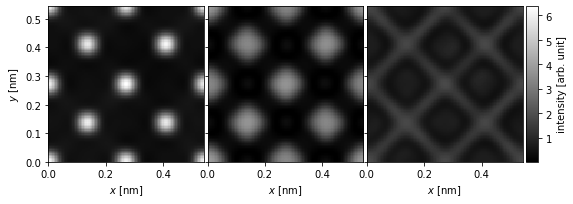

In [9]:
visualization.set_column_titles(titles="")

visualization.fig

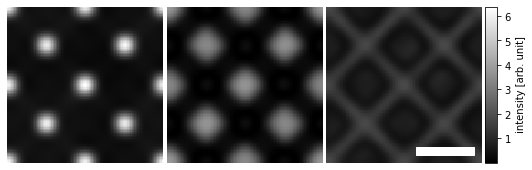

In [10]:
visualization.axis_off(spines=False)
visualization.set_sizebars(size=2, color="w")

visualization.fig

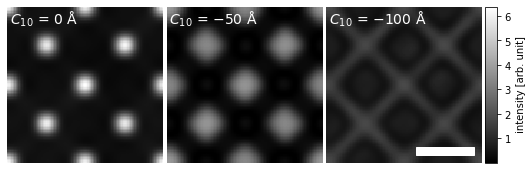

In [11]:
visualization.set_panel_labels(
    labels="metadata", frameon=False, prop={"fontsize": 14, "color": "w"}
)

visualization.fig

## Diffraction spots

In [12]:
atoms_cell = ase.build.bulk("Si", cubic=True)

atoms = atoms_cell * (1, 1, 10)

potential = abtem.Potential(atoms, sampling=0.05)

wave = abtem.PlaneWave(energy=200e3)

wave.grid.match(potential)

measurements = wave.multislice(potential).compute()

spots = measurements.diffraction_patterns().index_diffraction_spots(
    cell=atoms_cell.cell, threshold=1e-4
)

[########################################] | 100% Completed | 227.42 ms


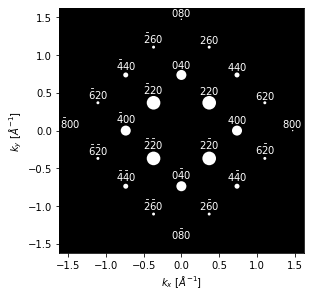

In [24]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["w"])

visualization = (
    spots.crop(60)
    .block_direct()
    .show(
        explode=False,
        scale=.5,
        cmap=cmap,
        power=.5,
        common_color_scale=True,
        display=False,
    )
)

for ax in np.array(visualization.axes).ravel():
    ax.set_facecolor("k")

visualization.set_x_units(units="1/Å")
visualization.set_y_units(units="1/Å")

visualization.set_miller_index_annotations(0.00015, size=10, color="w")

visualization.fig

## 2D grids

In [14]:
defocus = np.linspace(-50, 50, 7)
Cs = np.linspace(0, 400000, 5)

atoms = ase.build.graphene(vacuum=2)

exit_wave = abtem.PlaneWave(energy=80e3, sampling=0.05).multislice(atoms)

focal_spread = 30
defocus_distribution = abtem.distributions.gaussian(
    center=0.0,
    standard_deviation=focal_spread,
    num_samples=101,
    sampling_limit=2,
)

images = (
    exit_wave.apply_ctf(defocus=defocus, Cs=Cs)
    .apply_ctf(defocus=defocus_distribution)
    .intensity()
    .sum(0)
    .compute()
)

[########################################] | 100% Completed | 667.83 ms


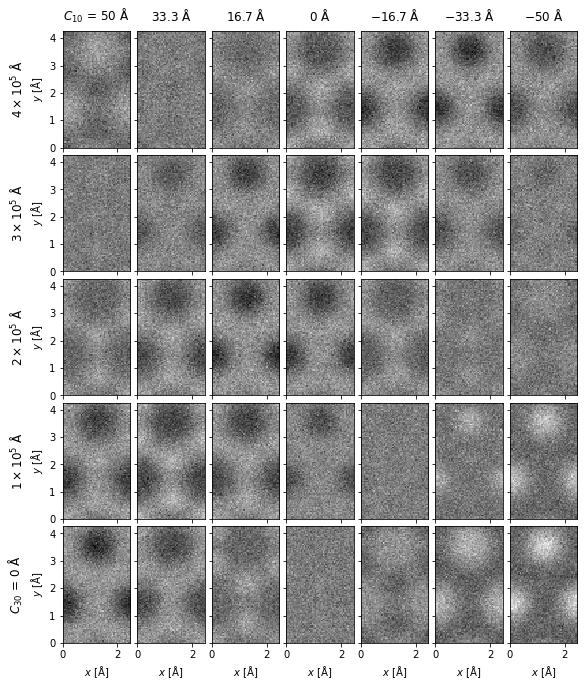

In [15]:
visualization = images.poisson_noise(5e5).show(
    explode=True, figsize=(10, 10), common_color_scale=True, cmap="gray"
)

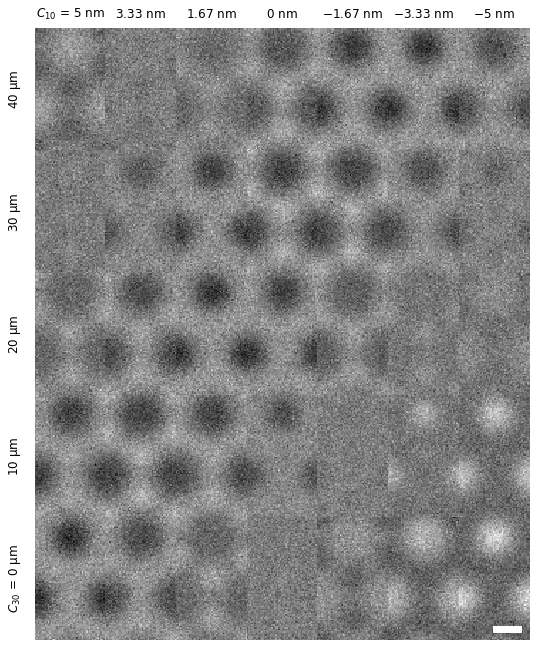

In [16]:
visualization.set_axes_padding([0.0, 0.0])
visualization.axis_off(spines=False)
visualization.set_row_titles(units="um")
visualization.set_column_titles(units="nm")
visualization.set_sizebars(size=1, color="w")

visualization.fig

## Domain coloring

In [17]:
probe = abtem.Probe(
    semiangle_cutoff=30,
    defocus=60,
    astigmatism=np.linspace(0, 70, 3),
    astigmatism_angle=np.pi / 4,
    gpts=256,
    extent=20,
    energy=200e3,
)
probes = probe.build().complex_images().compute()

[########################################] | 100% Completed | 107.94 ms


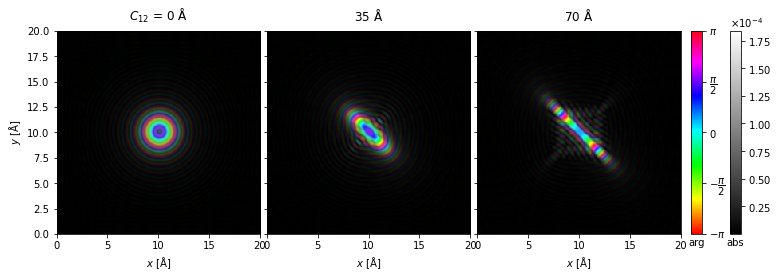

In [19]:
visualization = probes.show(
    explode=True, figsize=(12, 6), cbar=True, common_color_scale=True, cmap="hsv"
)

In [20]:
diffraction_patterns = (
    probe.build((0, 0)).diffraction_patterns(return_complex=True).crop(30)
)

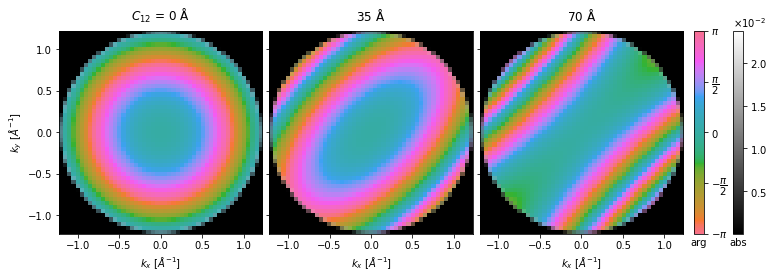

In [21]:
visualization = diffraction_patterns.show(
    explode=True, figsize=(12, 6), cbar=True, common_color_scale=True, cmap="hsluv"
)